In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools

In [2]:
importlib.reload(ExperimentClass)
manip = ExperimentClass.Experiment("20230427_Effect_of_light_intensity", "Oxygen_electrode", local = "IBPC" , diff_xaxis = True)

In [37]:
importlib.reload(tools)
with_pierre_records = tools.create_record_list("55-62,68-70")
gamme_records = tools.create_record_list("156-201")


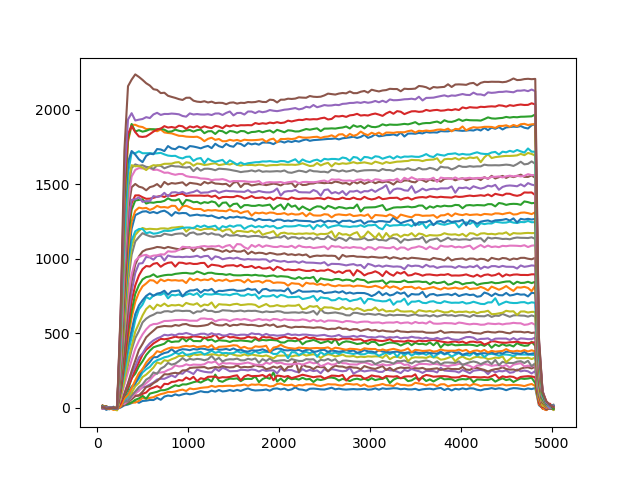

In [38]:
plt.figure()

for k in gamme_records:
    plt.plot(manip.clean_times[manip.records.index(k)], manip.clean_data[manip.records.index(k)], label = k)

In [39]:
data = pd.DataFrame(manip.clean_times[manip.records.index("E151")], columns=["Time"])
stationnary = []
tau = []
y = []
from scipy.optimize import curve_fit

def func_fit(xdata, ydata, start, stop, num, p0 = None):
    def func(x, A, C):
        return A * (1- np.exp(-(x-219)/C))

    popt, _ = curve_fit(func, xdata, ydata, p0 = p0)
    xfit = np.linspace(start, stop, num)
    yfit = func(xfit, popt[0], popt[1])
    return popt, xfit, yfit

for i, k in enumerate(gamme_records):
    data.insert(i+1,k,manip.clean_data[manip.records.index(k)], k)
    guess_A = np.mean(data[k][int(len(data[k])/2):])
    guess_tau = np.abs((np.asarray(data[k])[-1]/2)*((data["Time"][5]-data["Time"][4])/data[k][5]))


    popt, xfit, yfit =  func_fit(data["Time"][4:5*20],data[k][4:5*20], data["Time"][4], data["Time"][5*20-1],100, p0 = [guess_A, guess_tau])
    stationnary.append(popt[0])
    tau.append(popt[1])
    y.append(yfit)

aux = pd.read_csv(f"{manip.path}/pre_annotation.csv", index_col=False)
Intensities = aux[aux["Record_str"].isin(gamme_records)]["Light_intensity"].tolist()


c:\Users\Orlando\anaconda3\envs\PhD_environment\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


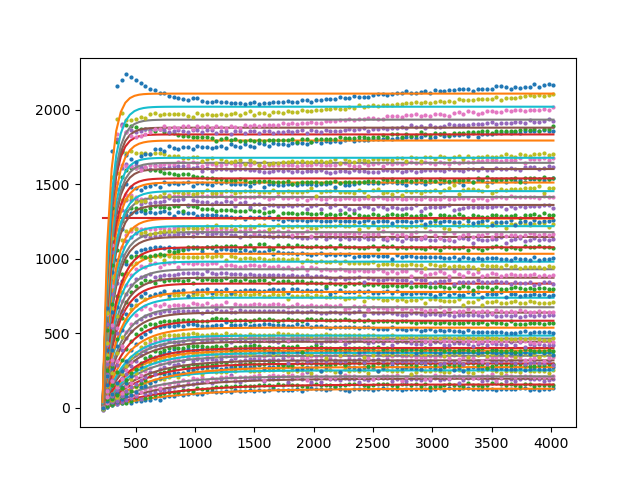

In [44]:
plt.figure()
for i, k in enumerate(gamme_records):
    plt.plot(data["Time"][4:5*20],data[k][4:5*20], 'o', markersize = 2)
    plt.plot(xfit,y[i])

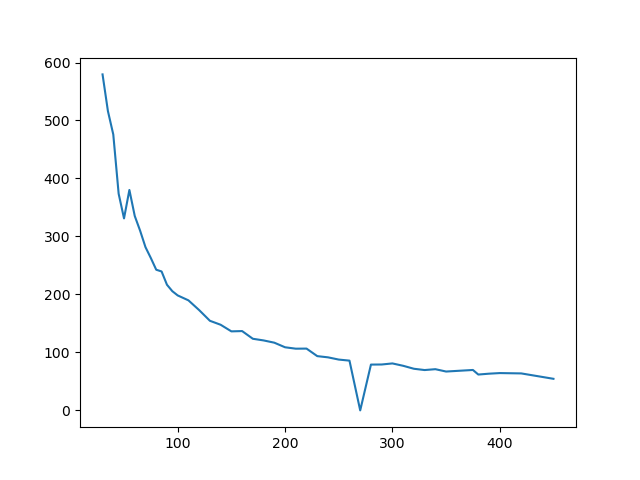

In [41]:
plt.figure()
plt.plot(Intensities, tau)

In [42]:
tau2 = []
for k in gamme_records:
    tau2.append(np.abs((np.asarray(data[k])[-1]/2)*((data["Time"][5]-data["Time"][4])/data[k][5])))

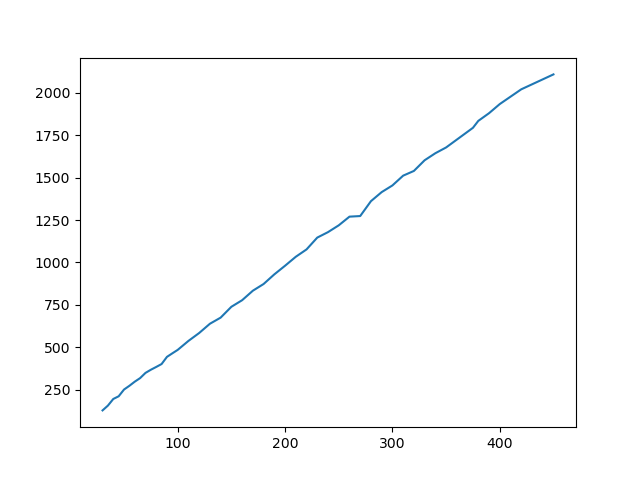

In [45]:
plt.figure()
plt.plot(Intensities,stationnary)